# 1. IMPORT LIBRARIES

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../src')
from models import LogisticRegression, KNN, find_best_k, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc_score, cross_validation
from visualization import plot_confusion_matrix, plot_training_history, plot_roc_curve

# 2. LOAD DATA

In [18]:
X_train = np.load('../data/processed/X_train.npy')
X_test = np.load('../data/processed/X_test.npy')
y_train = np.load('../data/processed/y_train.npy')
y_test = np.load('../data/processed/y_test.npy')

print(f"Train shape: {X_train.shape}, {y_train.shape}")
print(f"Test shape:  {X_test.shape}, {y_test.shape}")

Train shape: (8102, 16), (8102,)
Test shape:  (2025, 16), (2025,)


# 3. LOGISTIC REGRESSION

## 3.1 Cross Validation

In [19]:
cv_scores_log, cv_mean_log, cv_std_log = cross_validation(
    X_train, y_train, 
    model_class=LogisticRegression, 
    k_folds=5, 
    learning_rate=0.1, n_iterations=3000, regularization = 'l2', lambda_reg = 0.01
)
print(f"CV Scores: {cv_scores_log}")
print(f"CV Accuracy: {cv_mean_log:.4f} (+/- {cv_std_log:.4f})")

CV Scores: [0.89574337 0.89697717 0.90123457 0.89814815 0.90864198]
CV Accuracy: 0.9001 (+/- 0.0046)


## 3.2 Model Training

In [20]:
log_reg = LogisticRegression(learning_rate=0.1, n_iterations=3000, regularization = 'l2', lambda_reg = 0.01)
log_reg.fit(X_train, y_train)
print("Training completed.")

Training completed.


## 3.3 Training History Visualization

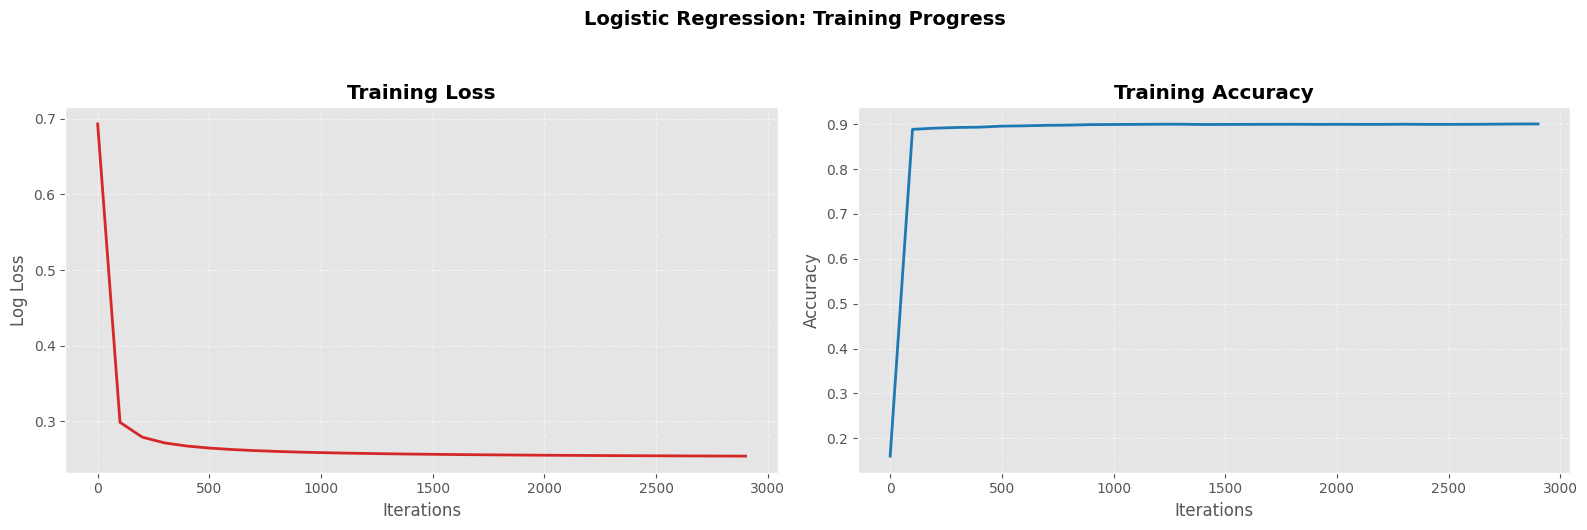

In [21]:
plot_training_history(log_reg, title='Logistic Regression: Training Progress')

## 3.4 Evaluation

In [22]:
y_pred_log = log_reg.predict(X_test, threshold=0.5)
y_prob_log = log_reg.predict_proba(X_test)

acc_log = accuracy_score(y_test, y_pred_log)
prec_log = precision_score(y_test, y_pred_log)
rec_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)

print(f"LOGISTIC REGRESSION METRICS")
print(f"Accuracy:  {acc_log:.4f}")
print(f"Precision: {prec_log:.4f}")
print(f"Recall:    {rec_log:.4f}")
print(f"F1-Score:  {f1_log:.4f}")

LOGISTIC REGRESSION METRICS
Accuracy:  0.8889
Precision: 0.7429
Recall:    0.4771
F1-Score:  0.5810


## 3.5 Confusion Matrix

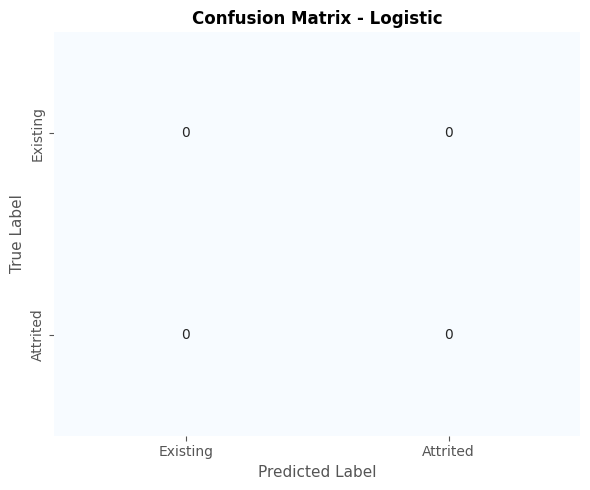

In [23]:
cm_log = confusion_matrix(y_test, y_prob_log)
plot_confusion_matrix(cm_log, classes=['Existing', 'Attrited'], title='Confusion Matrix - Logistic')

## 3.6 ROC & AUC

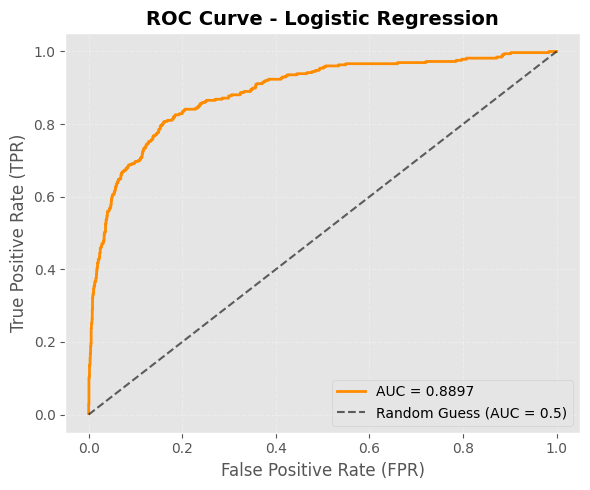

In [24]:
fpr_log, tpr_log = roc_curve(y_test, y_prob_log)
auc_log = auc_score(fpr_log, tpr_log)
plot_roc_curve(fpr_log, tpr_log, auc_log, title='ROC Curve - Logistic Regression')


# 4. K-Nearest Neighbors (KNN)

## 4.1 Find Best K

Finding Optimal K...
Optimal K: 13 (Accuracy: 0.9022)


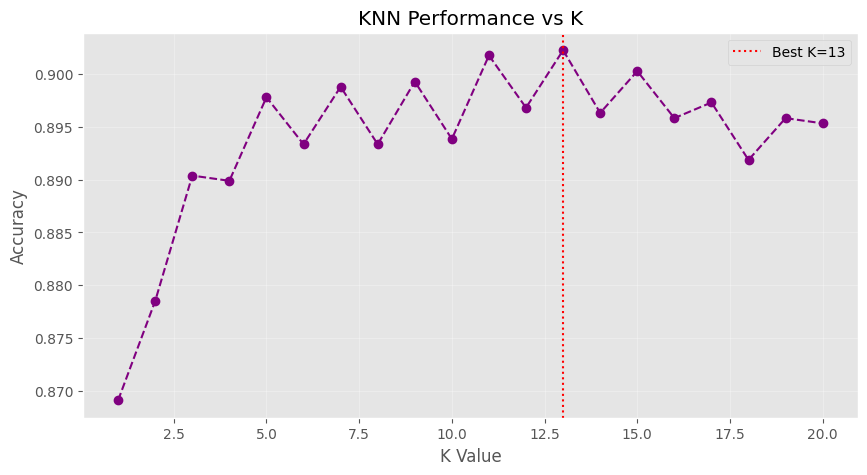

In [25]:
print("Finding Optimal K...")
best_k, best_acc, acc_history = find_best_k(X_train, y_train, X_test, y_test, max_k=20)
print(f"Optimal K: {best_k} (Accuracy: {best_acc:.4f})")

plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), acc_history, marker='o', linestyle='--', color='purple')
plt.axvline(best_k, color='red', linestyle=':', label=f'Best K={best_k}')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('KNN Performance vs K')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 4.2 Cross Validation

In [34]:
cv_scores_knn, cv_mean_knn, cv_std_knn = cross_validation(
    X_train, y_train, 
    model_class=KNN, 
    k_folds=5, 
    k=best_k
)
print(f"CV Scores: {cv_scores_knn}")
print(f"Mean CV Accuracy: {cv_mean_knn:.4f} (+/- {cv_std_knn:.4f})")

CV Scores: [0.9025293  0.90746453 0.89876543 0.90308642 0.89444444]
Mean CV Accuracy: 0.9013 (+/- 0.0044)


## 4.2 Model Training

In [36]:
knn_model = KNN(k=best_k)
knn_model.fit(X_train, y_train)
print("Training completed.")

Training completed.


In [37]:
y_pred_knn = knn_model.predict(X_test)
y_prob_knn = knn_model.predict_proba(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
prec_knn = precision_score(y_test, y_pred_knn)
rec_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print(f"KNN METRICS (K={best_k})")
print(f"Accuracy:  {acc_knn:.4f}")
print(f"Precision: {prec_knn:.4f}")
print(f"Recall:    {rec_knn:.4f}")
print(f"F1-Score:  {f1_knn:.4f}")

KNN METRICS (K=13)
Accuracy:  0.9022
Precision: 0.8728
Recall:    0.4618
F1-Score:  0.6040


## 4.3 Confusion Matrix

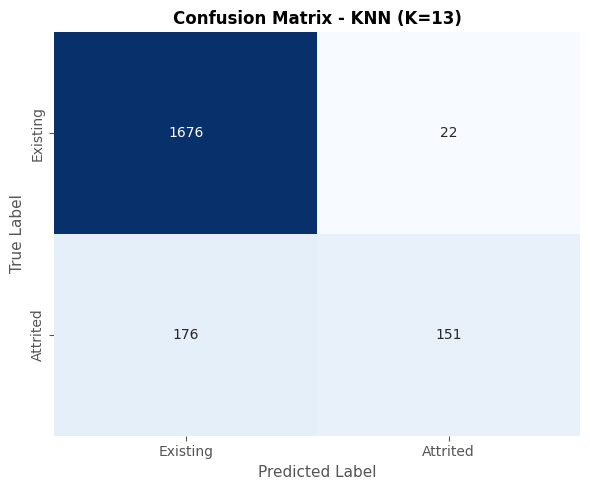

In [38]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
plot_confusion_matrix(cm_knn, classes=['Existing', 'Attrited'], title=f'Confusion Matrix - KNN (K={best_k})')

## 4.4 ROC & AUC

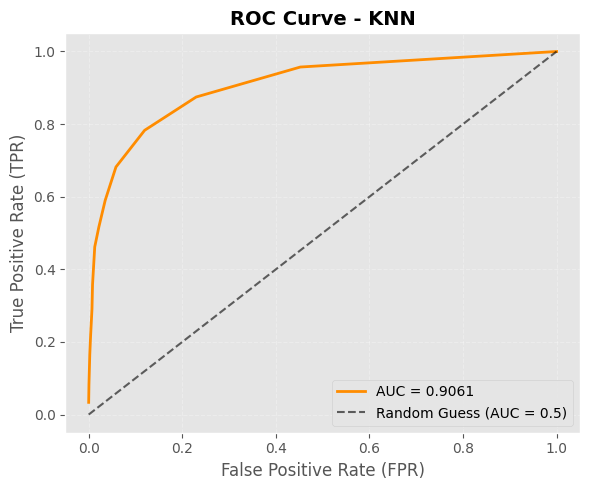

In [39]:
fpr_knn, tpr_knn = roc_curve(y_test, y_prob_knn)
auc_knn = auc_score(fpr_knn, tpr_knn)
plot_roc_curve(fpr_knn, tpr_knn, auc_knn, title='ROC Curve - KNN')

# 5 KIỂM TRA VÀ ĐÁNH GIÁ 2 MODEL